### 문제 풀기에 앞서 사용할 라이브러리 파일들 실행 

In [8]:
# 라이브러리 파일 실행
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [ ]:
path = '/Users/limdonggeon/Desktop/workspace/limdg119.github.io/posts/data'

# 1. 지하철 유무임 승차비율 데이터 분석

In [9]:
# 데이터 불러오기
data1 = []
with open(path+'/metro_fare.csv', 'r', encoding='cp949') as f:
    source1 = csv.reader(f, delimiter=',')
    #print(source)
    header1 = next(source1)
    for row in source1:
        data1.append(row)

# 데이터 확인
print(header1)
print(data1[0])

# 데이터 ndarray로 만들기
data_array1 = np.array(data1)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시', '']
['Jun-22', '1호선', '150', '서울역', '1,150,754', '1,123,193', '194,717', '187,155', '2022-07-03 9:48', '2,655,819']


In [10]:
# 불러온 데이터 결측치 여부 확인
cnt = 0
for row in range(len(data_array1)):
    for i in range(len(data_array1[0])):
        if ((data_array1[row][i] == '') or (data_array1[row][i] == np.NAN)):
            cnt = cnt + 1
            print(cnt, '번째 결측치',row,i)

if cnt == 0:
    print('결측치가 존재하지 않습니다.')

결측치가 존재하지 않습니다.


In [11]:
# 같은 역에대한 데이터가 존재하는지 확인
# 이름이 같지만 호선이 다른 경우 다른 역으로 표현함 (1호선 시청역과 2호선 시청역은 다름)
# 호선 + 역 이름으로 역 리스트 생성
cnt = 0
station1 = []
for row in range(len(data_array1)):
    station_name1 = data_array1[row][1] + ' ' + data_array1[row][3]
    if station_name1 in station1:
        print(station_name1 +'이 겹칩니다.')
    station1.append(station_name1)
if cnt == 0:
    print('호선과 역 이름이 동시에 겹치는 역이 없습니다.')

호선과 역 이름이 동시에 겹치는 역이 없습니다.


In [12]:
# ndarray형태에서 ,때문에 인원들에 대한 요소값을 int 형태로 변경 불가
# list를 만들어 ,를 지운 후 ndarray형태로 변경
stationary_board_list = []
free_board_list = []
stationary_deboard_list = []
free_deboard_list = []

for row in data1:
    stationary_board_list.append(row[4].replace(',',''))
    free_board_list.append(row[6].replace(',',''))
    stationary_deboard_list.append(row[5].replace(',',''))
    free_deboard_list.append(row[7].replace(',',''))

stationary_board_array = np.array(stationary_board_list)
free_board_array = np.array(free_board_list)
stationary_deboard_array = np.array(stationary_deboard_list)
free_deboard_array = np.array(free_deboard_list)

# 승차인원
# 유임승차 인원에 대한 요소값의 형태를 int로 변경
stationary_board = stationary_board_array.astype(int)
# 무임승차 인원에 대한 요소값의 형태를 int로 변경
free_board = free_board_array.astype(int)

# 하차인원
# 유임하차 인원에 대한 요소값의 형태를 int로 변경
stationary_deboard = stationary_deboard_array.astype(int)
# 무임하차 인원에 대한 요소값의 형태를 int로 변경
free_deboard = free_deboard_array.astype(int)

## 1-1. 총 승차인원(유임승차+무임승차)이 가장 많은 역과 그 역의 승차인원을 출력하고 총 하차인원(유임하차+무임하차)이 가장 많은 역과 그 역의 하차인원을 출력하세요.

In [13]:
print('1-1. 총 승차인원(유임승차+무임승차)이 가장 많은 역과 그 역의 승차인원을 출력하고 총 하차인원(유임하차+무임하차)이 가장 많은 역과 그 역의 하차인원을 출력하세요.')
# 역별 승차인원 ndarray 만들기
total_board = stationary_board + free_board
# 최대 승차인원 값과 인덱스 찾기
board_max_idx = np.argmax(total_board)
board_max_value = total_board[board_max_idx]
print(f'최대 승차 : {station1[board_max_idx]}역 {board_max_value}명 승차')

# 역별 하차인원 ndarray 만들기
total_deboard = stationary_deboard + free_deboard
# 최대 하차인원 값과 인덱스 찾기
deboard_max_idx = np.argmax(total_deboard)
deboard_max_value = total_deboard[deboard_max_idx]
print(f'최대 하차 : {station1[deboard_max_idx]}역 {deboard_max_value}명 하차')

1-1. 총 승차인원(유임승차+무임승차)이 가장 많은 역과 그 역의 승차인원을 출력하고 총 하차인원(유임하차+무임하차)이 가장 많은 역과 그 역의 하차인원을 출력하세요.
최대 승차 : 2호선 강남역 2209994명 승차
최대 하차 : 2호선 강남역 2175932명 하차


## 1-2. 유임승차자의 비율(유임승차/총 승차인원)이 가장 높은 상위 10개 역과 각각의 유임승차자 비율을 구하세요.

In [14]:
print('1-2 유임승차자의 비율(유임승차/총 승차인원)이 가장 높은 상위 10개 역과 각각의 유임승차자 비율을 구하세요.')
# 역별 유임승차자 비율 ndarray 만들기
stationary_rate = stationary_board/total_board

# 유임승차자 비율 큰 순서로 정렬한 인덱스
sort_index = np.argsort(stationary_rate)[ : : -1]

# 상위 10개역 출력
for i in range(10):
    print(f'{i+1}. {station1[sort_index[i]]}역 유임승차자 비율 : {stationary_rate[sort_index[i]]}')


1-2 유임승차자의 비율(유임승차/총 승차인원)이 가장 높은 상위 10개 역과 각각의 유임승차자 비율을 구하세요.
1. 2호선 한양대역 유임승차자 비율 : 0.9556973033604169
2. 공항철도 1호선 홍대입구역 유임승차자 비율 : 0.9471593106448806
3. 2호선 홍대입구역 유임승차자 비율 : 0.94658480261284
4. 경부선 서울역역 유임승차자 비율 : 0.9403566042189232
5. 공항철도 1호선 마곡나루(서울식물원)역 유임승차자 비율 : 0.9400488818077928
6. 9호선 신논현역 유임승차자 비율 : 0.9384016412930402
7. 9호선 여의도역 유임승차자 비율 : 0.9373539462006335
8. 6호선 한강진역 유임승차자 비율 : 0.9372195113990568
9. 공항철도 1호선 디지털미디어시티역 유임승차자 비율 : 0.9338371458237441
10. 공항철도 1호선 청라국제도시역 유임승차자 비율 : 0.9332706439591822


# 2. 지하철 시간대별 승하차 데이터 분석

In [15]:
data2 = []
with open('metro_time.csv', 'r', encoding='cp949') as f:
    source2 = csv.reader(f, delimiter=',')
    header2_1 = next(source2)
    header2_2 = next(source2)
    for row in source2:
        data2.append(row)

# 데이터 확인
print(header2_1)
print(header2_2)
print(data2[0])

# 데이터 ndarray로 만들기
data_array2 = np.array(data2)

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '', '작업일시']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '']
['2022-06', '1호선', '0150', '서울역', '646', '24', '8,433

In [16]:
# 불러온 데이터 결측치 여부 확인
cnt = 0
for row in range(len(data_array2)):
    for i in range(len(data_array2[0])):
        if ((data_array2[row][i] == '') or (data_array2[row][i] == np.NaN)):
            cnt = cnt + 1
            print(cnt, '번째 결측치',row,i)

if cnt == 0:
    print('결측치가 존재하지 않습니다.')

결측치가 존재하지 않습니다.


In [17]:
# 같은 역에대한 데이터가 존재하는지 확인
# 이름이 같지만 호선이 다른 경우 다른 역으로 표현함 (1호선 시청역과 2호선 시청역은 다름)
# 호선 + 역 이름으로 역 리스트 생성
cnt = 0
station2 = []
for row in range(len(data_array2)):
    station_name2 = data_array2[row][1] + ' ' + data_array2[row][3]
    if station_name2 in station2:
        print(station_name2 +'이 겹칩니다.')
    station2.append(station_name2)
if cnt == 0:
    print('호선과 역 이름이 동시에 겹치는 역이 없습니다.')

호선과 역 이름이 동시에 겹치는 역이 없습니다.


In [18]:
# ndarray형태에서 ,때문에 인원들에 대한 요소값을 int 형태로 변경 불가
# list를 만들어 ,를 지운 후 ndarray형태로 변경
time_board_mat = []
time_deboard_mat = []
for i in range(24):
    time_board_list = []
    time_deboard_list = []
    for row in data2:
        time_board_list.append(row[4+2*i].replace(',',''))
        time_deboard_list.append(row[5+2*i].replace(',',''))
    time_board_mat.append(time_board_list)
    time_deboard_mat.append(time_deboard_list)

time_board_array = np.array(time_board_mat).astype(int)
time_deboard_array = np.array(time_deboard_mat).astype(int)

## 2-1. 출근 시간대(7시~9시) 승차인원과 하차인원 각각에 대해 정렬된 barplot을 그리고, 인원이 가장 많은 역과 인원을 각각 찾으세요.

In [19]:
# 출근 시간대 승차인원
time_board_7to9 = time_board_array[3,:] + time_board_array[4,:]
# 출근 시간대 승차인원이 적은 순으로 인덱스와 값 정렬
time_board_7to9_idx = np.argsort(time_board_7to9)
time_board_7to9_value = time_board_7to9[time_board_7to9_idx]

# 출근 시간대 하차인원 정렬
time_deboard_7to9 = time_deboard_array[3,:] + time_deboard_array[4,:]
# 출근 시간대 하차인원이 적은 순으로 인덱스와 값 정렬
time_deboard_7to9_idx = np.argsort(time_deboard_7to9)
time_deboard_7to9_value = time_deboard_7to9[time_deboard_7to9_idx]

2-1 출근 시간대(7시~9시) 승차인원과 하차인원 각각에 대해 정렬된 barplot을 그리고, 인원이 가장 많은 역과 인원을 각각 찾으세요.
출근 시간대에 승차인원이 가장 많은 역 : 2호선 신림역 469127명 탑승


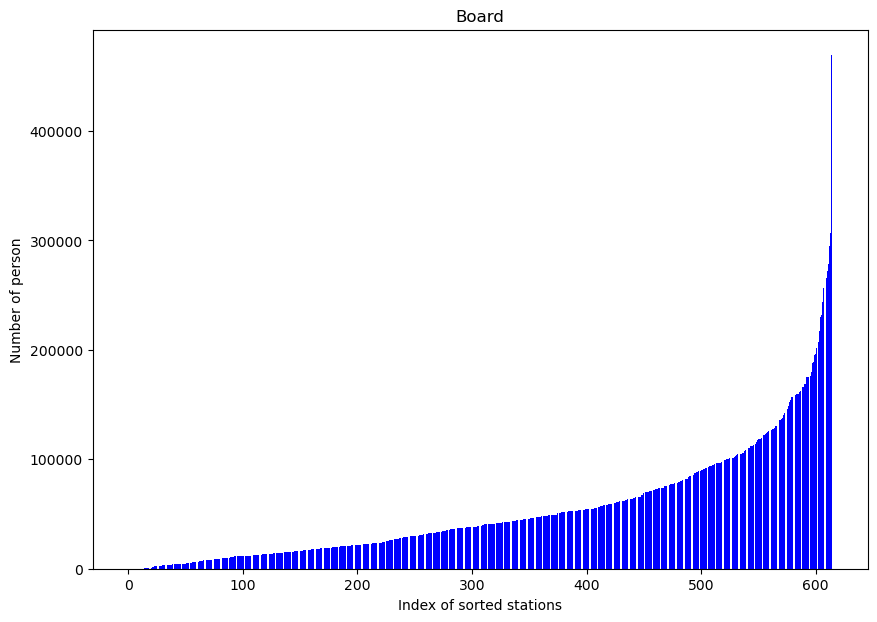

In [20]:
print('2-1 출근 시간대(7시~9시) 승차인원과 하차인원 각각에 대해 정렬된 barplot을 그리고, 인원이 가장 많은 역과 인원을 각각 찾으세요.')
print(f'출근 시간대에 승차인원이 가장 많은 역 : {station2[time_board_7to9_idx[-1]]}역 {time_board_7to9_value[-1]}명 탑승')
x_index = np.arange(len(time_board_7to9_idx))
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(x_index,time_board_7to9_value,color = 'blue')
plt.title("Board")
ax.set_xlabel("Index of sorted stations")
ax.set_ylabel("Number of person")
plt.show()

출근 시간대에 하차인원이 가장 많은 역 : 7호선 가산디지털단지역 486420명 하차


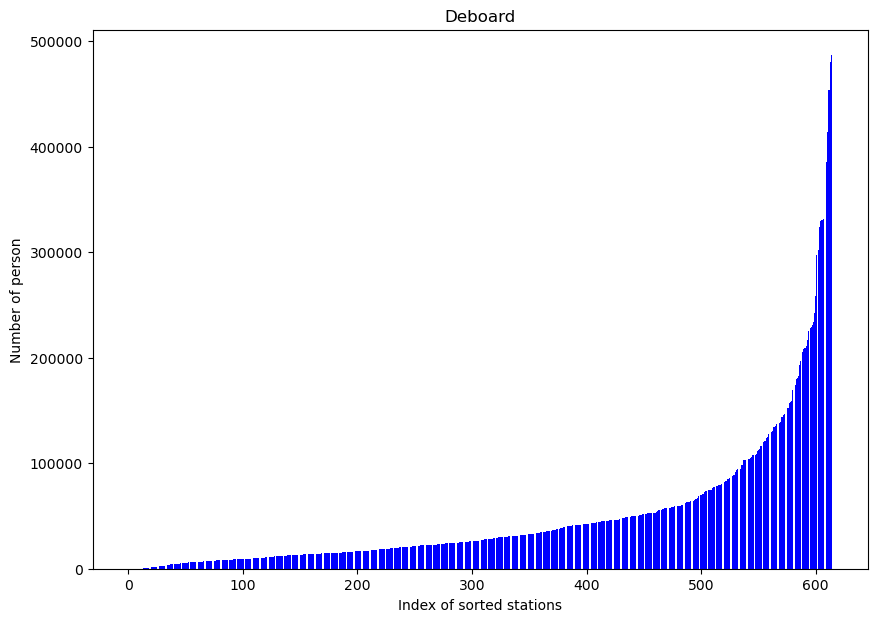

In [21]:
print(f'출근 시간대에 하차인원이 가장 많은 역 : {station2[time_deboard_7to9_idx[-1]]}역 {time_deboard_7to9_value[-1]}명 하차')
x_index = np.arange(len(time_deboard_7to9_idx))
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(x_index,time_deboard_7to9_value,color = 'blue')
plt.title("Deboard")
ax.set_xlabel("Index of sorted stations")
ax.set_ylabel("Number of person")
plt.show()

출근 시간대에 승차인원이 가장 많은 역 : 2호선 신림역 469127명 탑승
출근 시간대에 하차인원이 가장 많은 역 : 7호선 가산디지털단지역 486420명 하차


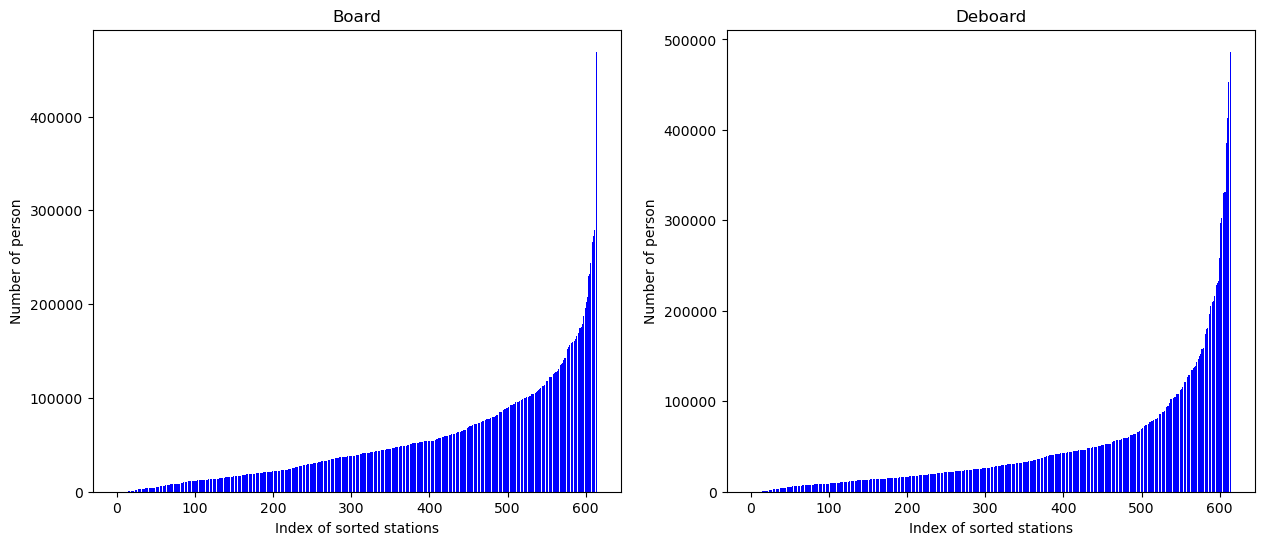

In [22]:
print(f'출근 시간대에 승차인원이 가장 많은 역 : {station2[time_board_7to9_idx[-1]]}역 {time_board_7to9_value[-1]}명 탑승')
print(f'출근 시간대에 하차인원이 가장 많은 역 : {station2[time_deboard_7to9_idx[-1]]}역 {time_deboard_7to9_value[-1]}명 하차')
x_index = np.arange(len(time_deboard_7to9_idx))
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax1.bar(x_index,time_board_7to9_value,color = 'blue')
ax1.set_title("Board")
ax1.set_xlabel("Index of sorted stations")
ax1.set_ylabel("Number of person")
ax2 = fig.add_subplot(122)
ax2.bar(x_index,time_deboard_7to9_value,color = 'blue')
ax2.set_title("Deboard")
ax2.set_xlabel("Index of sorted stations")
ax2.set_ylabel("Number of person")
plt.show()

## 2-2. 각 시간대별 모든 지하철역에서의 총 승차인원의 합과 총 하차인원의 합을 구하고, x축을 시간, y축을 인원으로 하는 그래프로 나타내시오.

In [16]:
#시간대 별 모든 지하철역에서의 총 승차인원의 합과 총 하차인원의 합
sum_time_board = []
sum_time_deboard = []
for i in range(24):
    sum_time_board.append(sum(time_board_array[i,:]))
    sum_time_deboard.append(sum(time_deboard_array[i,:]))

sum_time_board_array = np.array(sum_time_board)
sum_time_deboard_array = np.array(sum_time_deboard)

2-2 각 시간대별 모든 지하철역에서의 총 승차인원의 합과 총 하차인원의 합을 구하고, x축을 시간, y축을 인원으로 하는 그래프로 나타내시오.


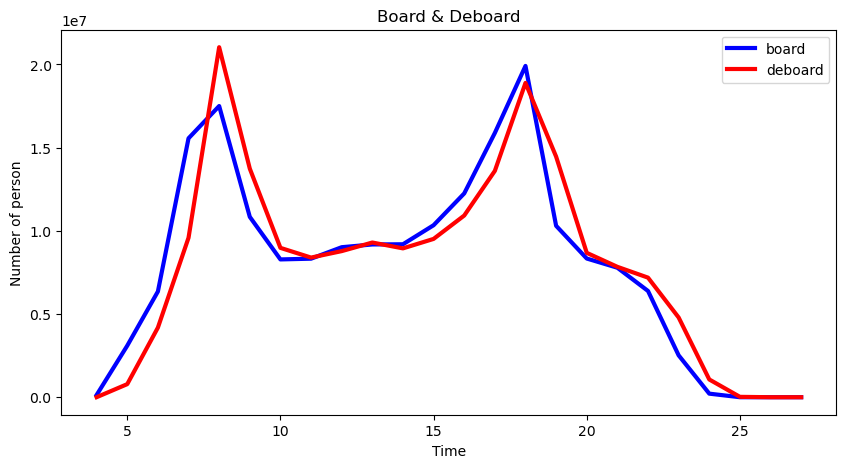

In [17]:
print('2-2 각 시간대별 모든 지하철역에서의 총 승차인원의 합과 총 하차인원의 합을 구하고, x축을 시간, y축을 인원으로 하는 그래프로 나타내시오.')
t_index = [t for t in range(4,28)]
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Board & Deboard")
ax.set_xlabel("Time")
ax.set_ylabel("Number of person")
plt.plot(t_index,sum_time_board_array, label='board', color = 'blue', linewidth= '3')
plt.plot(t_index,sum_time_deboard_array, label='deboard', color = 'red', linewidth= '3')
plt.legend()